In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


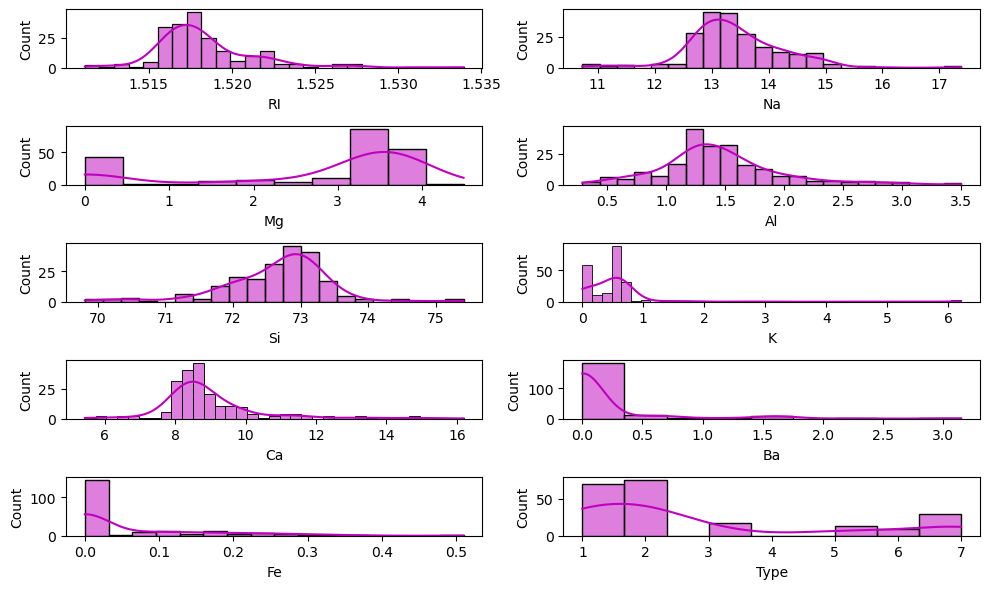

In [7]:
plotnumber=1
plt.figure(figsize=(10,6))
for col in df:
    if plotnumber<=10:
       ax=plt.subplot(5,2,plotnumber)
       sns.histplot(df[col],color='m',kde=True)
       plt.xlabel(col,fontsize=10)
       plt.yticks()
       plotnumber+=1
plt.tight_layout()        

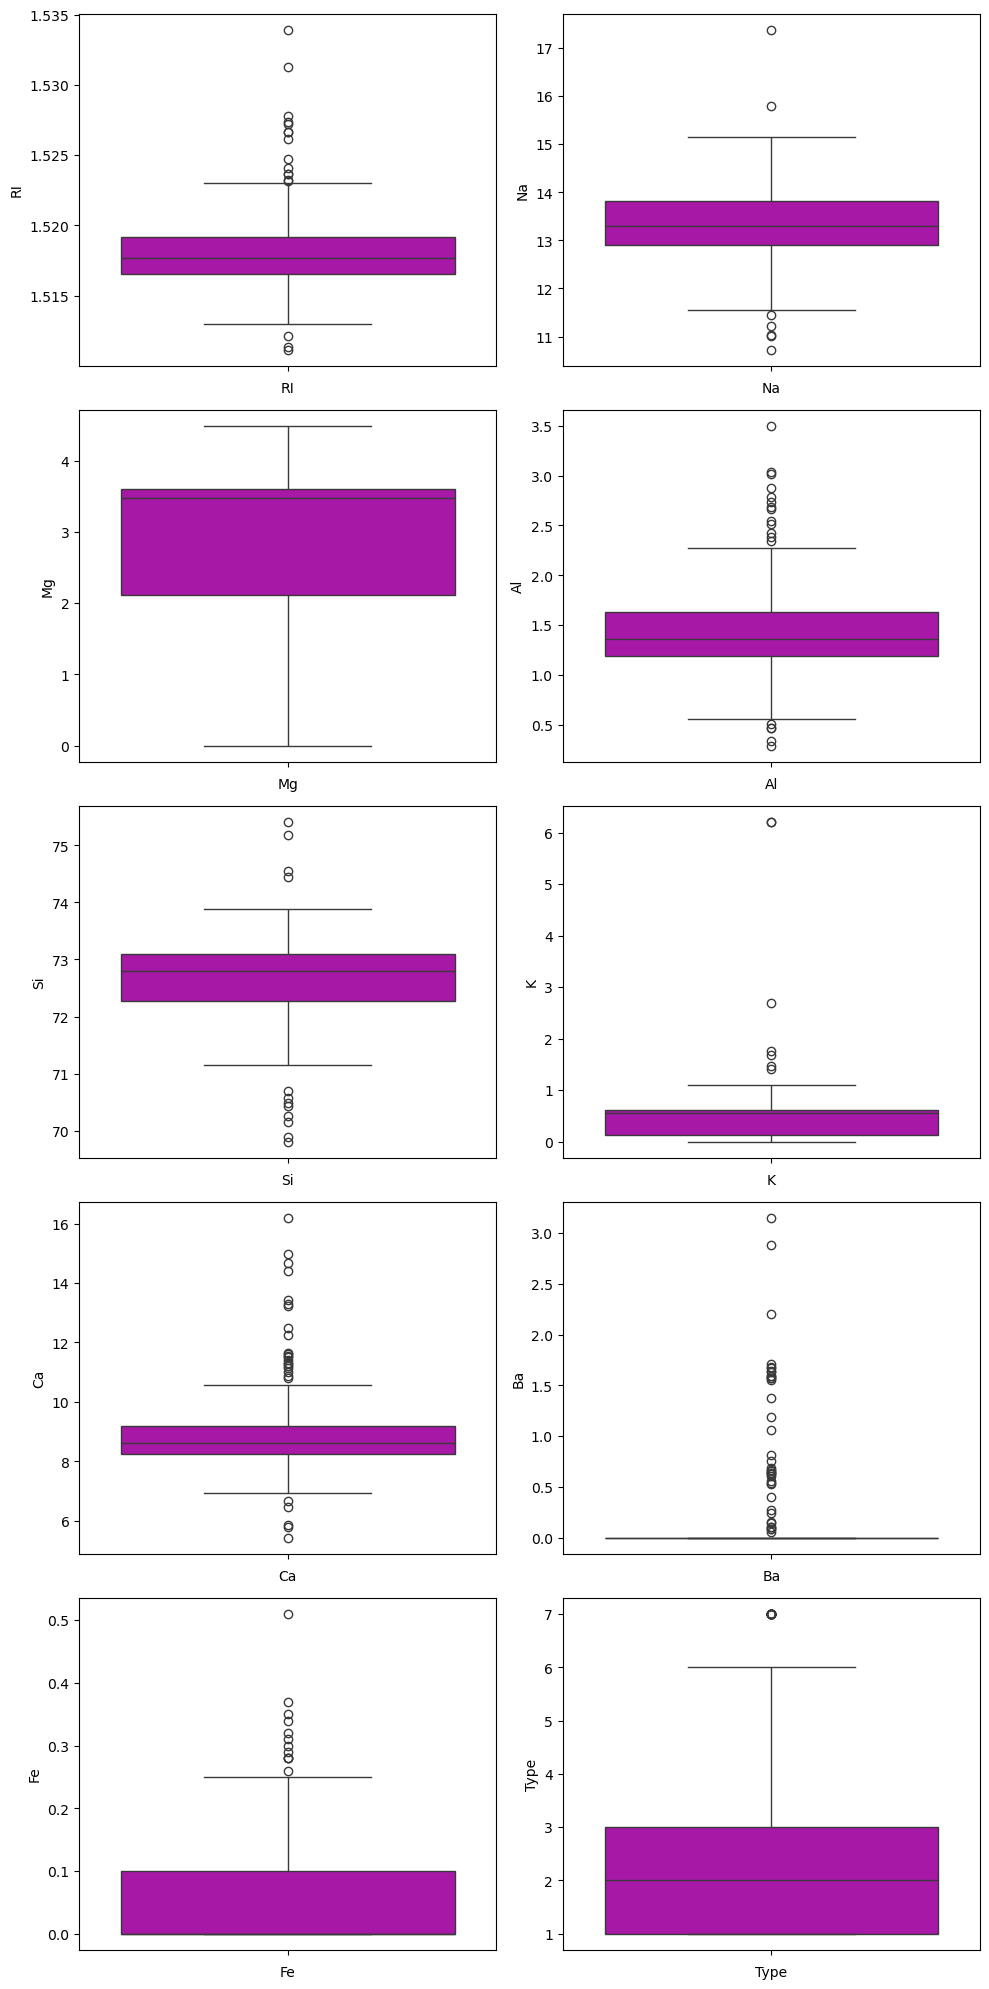

In [8]:
plotnumber=1
plt.figure(figsize=(10,20))
for col in df:
    if plotnumber<=10:
       ax=plt.subplot(5,2,plotnumber)
       sns.boxplot(df[col],color='m')
       plt.xlabel(col,fontsize=10)
       plt.yticks()
       plotnumber+=1
plt.tight_layout() 

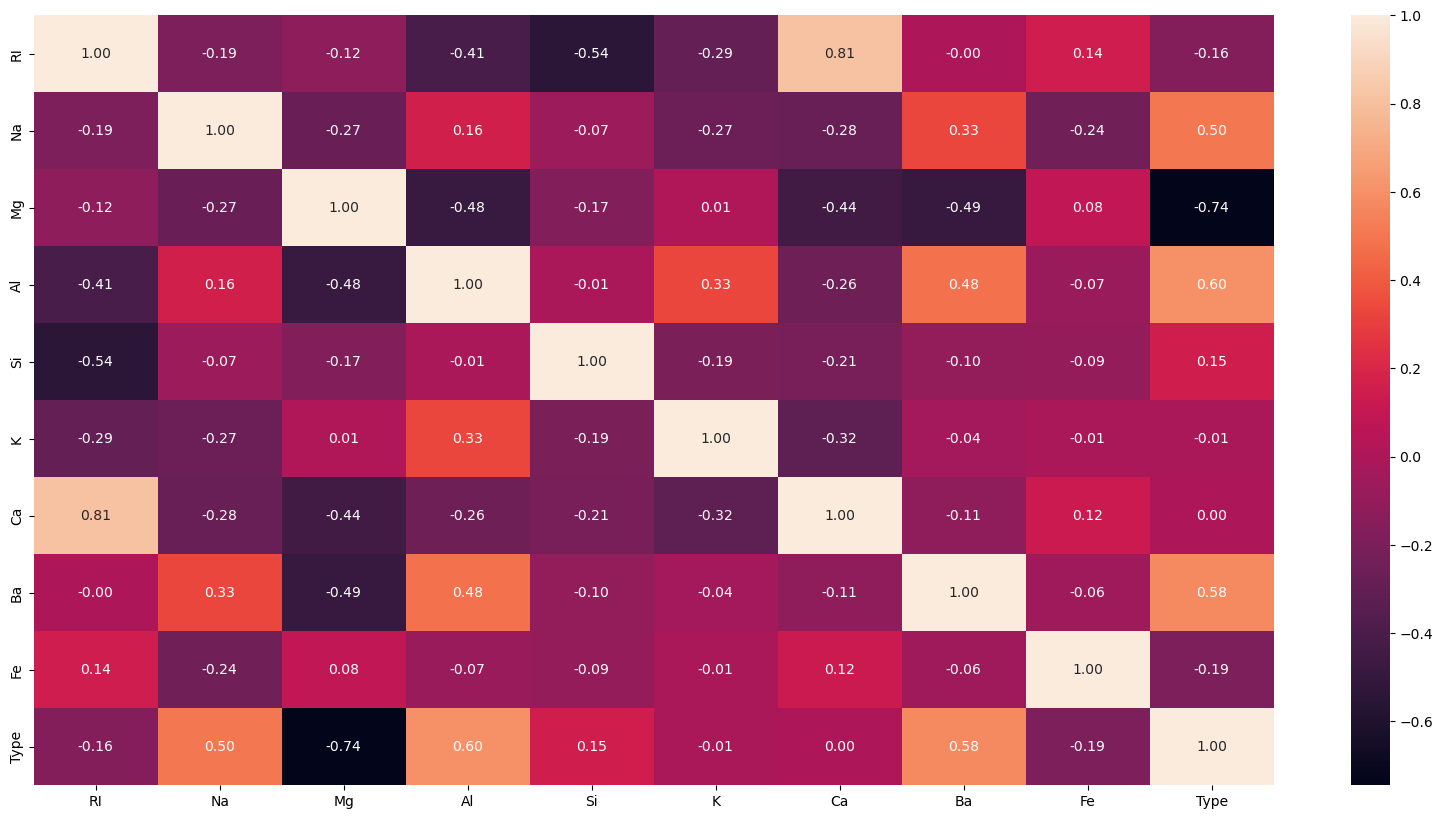

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.xticks()
plt.yticks()
plt.show()

In [10]:
corr=df.corr()
corr['Type'].sort_values()

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

In [11]:
from scipy.stats import zscore

In [12]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop('Type',axis=1)
Y=df['Type']

In [15]:
Y.value_counts()

Type
1    70
2    68
7    23
3    16
5     9
6     8
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sampling=SMOTE()
X,Y=sampling.fit_resample(X,Y)

In [18]:
Y.value_counts()

Type
1    70
2    70
3    70
5    70
6    70
7    70
Name: count, dtype: int64

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      420 non-null    float64
 1   Na      420 non-null    float64
 2   Mg      420 non-null    float64
 3   Al      420 non-null    float64
 4   Si      420 non-null    float64
 5   K       420 non-null    float64
 6   Ca      420 non-null    float64
 7   Ba      420 non-null    float64
 8   Fe      420 non-null    float64
dtypes: float64(9)
memory usage: 29.7 KB


In [20]:
Y=Y.apply(lambda y_val:1 if y_val<4 else 0)

In [21]:
Y.value_counts()

Type
1    210
0    210
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.323741,0.117340,1.544651,-1.023509,-1.952398,-0.975810,-0.441630,-0.405456,-0.504455
1,-0.278838,0.455690,0.958385,-0.444109,-0.112119,0.484433,-1.185869,-0.405456,-0.504455
2,-0.952864,-0.031534,0.925448,-0.042986,0.391536,0.171524,-1.226317,-0.405456,-0.504455
3,-0.255271,-0.464623,1.017670,-0.600101,-0.344575,0.797342,-0.870377,-0.405456,-0.504455
4,-0.368394,-0.383419,0.971559,-0.711524,0.565879,0.727807,-0.991720,-0.405456,-0.504455
...,...,...,...,...,...,...,...,...,...
415,-1.087628,0.964193,-1.413032,2.636817,1.047365,-1.045345,-0.195219,0.823604,0.333960
416,-0.919240,0.833111,-1.413032,2.903995,-0.286222,-0.941185,-0.066365,2.101748,-0.504455
417,-0.929297,0.800883,-1.413032,2.926254,-0.205826,-0.917993,-0.103323,2.126076,-0.393174
418,-1.270741,0.609345,-1.413032,2.339773,1.009735,-0.800837,-0.043747,1.386826,-0.067448


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [24]:
maxAccu=0
maxRs=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,random_state=i)
    lr=LogisticRegression()
    model=lr.fit(X_train,Y_train)
    pred=model.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is",maxAccu,'Random_State is',maxRs)    

Best accuracy is 1.0 Random_State is 8


In [25]:
from sklearn.model_selection import cross_val_score 

In [27]:
def evalution(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=8)
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    acc=(accuracy_score(Y_test,pred))*100
    class_report=classification_report(Y_test,pred)
    cross_val=(cross_val_score(model,X,Y,cv=5).mean())*100
    result=acc-cross_val
    print('Accuracy score :',acc)
    print('Classification Report :\n',
          class_report)
    print("Accuracy - Cross_val_score :",result)

In [28]:
lr=LogisticRegression()
evalution(lr,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 2.142857142857139


In [29]:
from sklearn.svm import SVC

In [30]:
sv=SVC()
evalution(sv,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 1.4285714285714164


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt=DecisionTreeClassifier()
evalution(dt,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 2.619047619047606


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc=RandomForestClassifier()
evalution(rfc,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 2.142857142857153


In [35]:
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
etc=ExtraTreesClassifier()
evalution(etc,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 1.6666666666666572


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier()
evalution(knn,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 1.904761904761898


In [39]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

In [40]:
gd=GradientBoostingClassifier()
evalution(gd,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 2.857142857142847


In [41]:
ad=AdaBoostClassifier()
evalution(ad,x,Y)

Accuracy score : 99.20634920634922
Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.99      0.99        70

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Accuracy - Cross_val_score : 2.5396825396825307


In [42]:
bg=BaggingClassifier()
evalution(bg,x,Y)

Accuracy score : 100.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        70

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy - Cross_val_score : 3.095238095238102


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=590)

In [45]:
params={'criterion':['gini','entropy'],
        'max_depth':[2,3,4],
        'max_leaf_nodes':[2,3,4],
       'min_samples_split':[0.1,0.5,0.8],
       'min_samples_leaf':[0.5,0.1,0.8],
       'bootstrap':[True,False],
       'oob_score':[True,False]}

In [46]:
rfc=RandomForestClassifier()
grid=GridSearchCV(rfc,param_grid=params)

In [47]:
grid.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [0.5, 0.1, 0.8],
                         'min_samples_split': [0.1, 0.5, 0.8],
                         'oob_score': [True, False]})

In [48]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'oob_score': True}

In [49]:
final_model=RandomForestClassifier(bootstrap=True,
 criterion='gini',
 max_depth=2,
 max_leaf_nodes=2,
 min_samples_leaf=0.1,
 min_samples_split=0.5,
 oob_score=True)

In [50]:
final_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=2, min_samples_leaf=0.1,
                       min_samples_split=0.5, oob_score=True)

In [51]:
pred=final_model.predict(X_test)

In [52]:
acc=accuracy_score(Y_test,pred)
print(acc)

0.9761904761904762


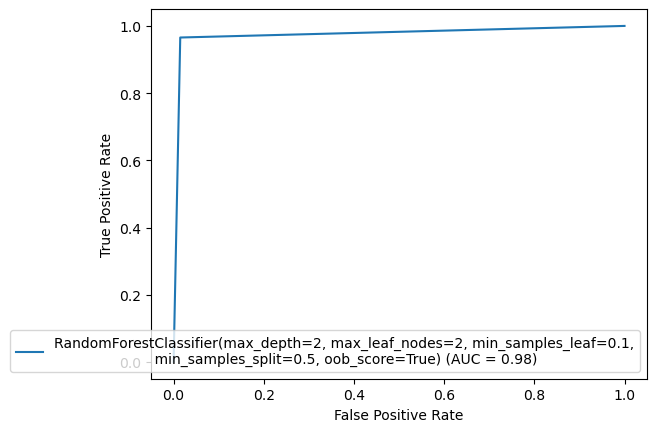

In [53]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,threshold=roc_curve(Y_test,pred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [54]:
import joblib
joblib.dump(final_model,'Glass_Quality.pkl')

['Glass_Quality.pkl']

In [55]:
model=joblib.load("Glass_Quality.pkl")
prediction=model.predict(X_test)
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [56]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

,Predicted,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
121,0,0
122,1,0
123,1,1
124,0,0
